# CUSTOMER SEGMENTATION USING MACHINE LEARNING

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Basic Dataset Analysis

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in our dataset.')

There are 200 rows and 5 columns in our dataset.


* CustomerID - Unique ID assigned to the customer
* Gender - Gender of the customer
* Age - Age of the customer
* Annual Income (k$) - Annual Income of the customee
* Spending Score (1-100) - Score assigned by the mall based on customer behavior and spending nature

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.drop(columns='CustomerID', axis=1, inplace=True)

In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

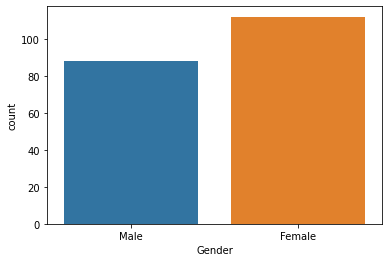

In [10]:
sns.countplot(data = df, x='Gender')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

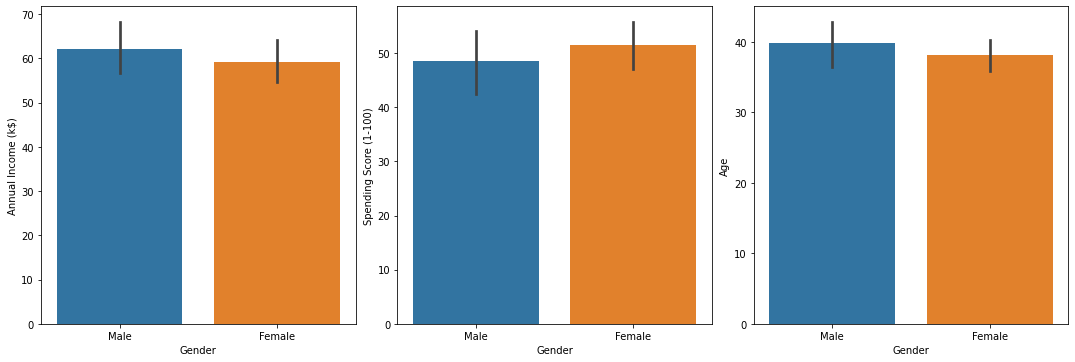

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.tight_layout()
sns.barplot(data=df, x='Gender', y='Annual Income (k$)', ax=axes[0])
sns.barplot(data=df, x='Gender', y='Spending Score (1-100)', ax=axes[1])
sns.barplot(data=df, x='Gender', y='Age', ax=axes[2])


Text(0, 0.5, 'Number of Customer')

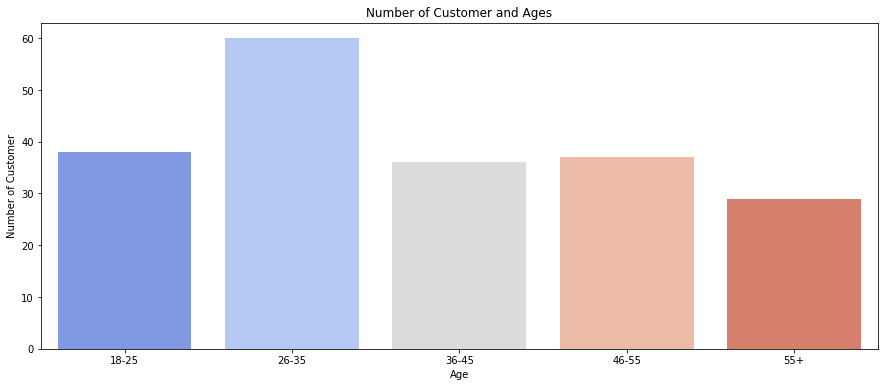

In [12]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="coolwarm")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")

Text(0, 0.5, 'Number of Customer Having the Score')

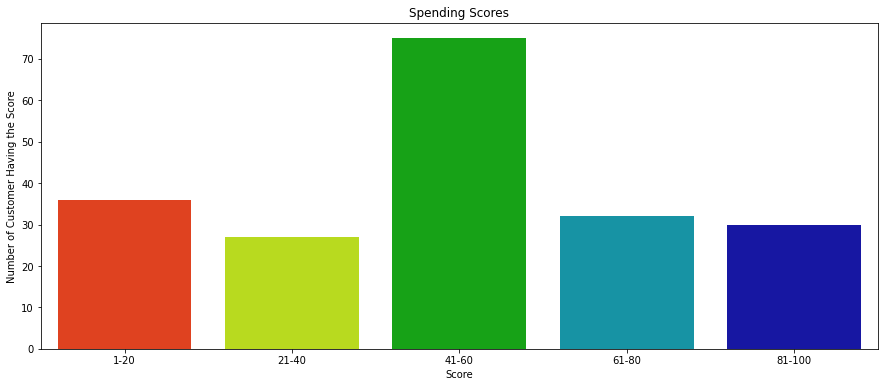

In [13]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")

Text(0, 0.5, 'Number of Customer')

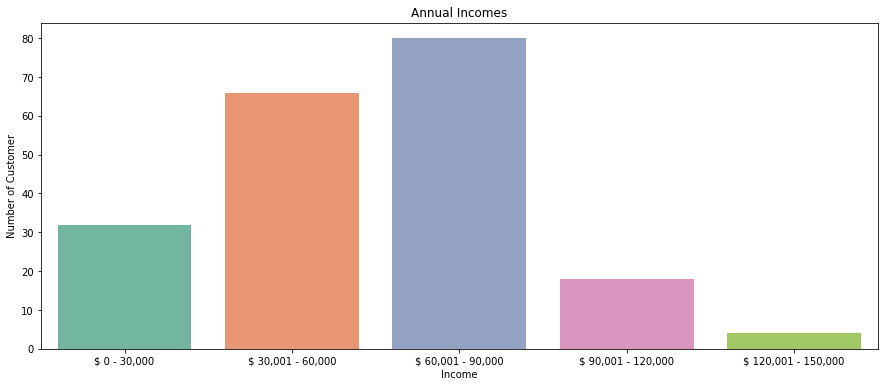

In [14]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")

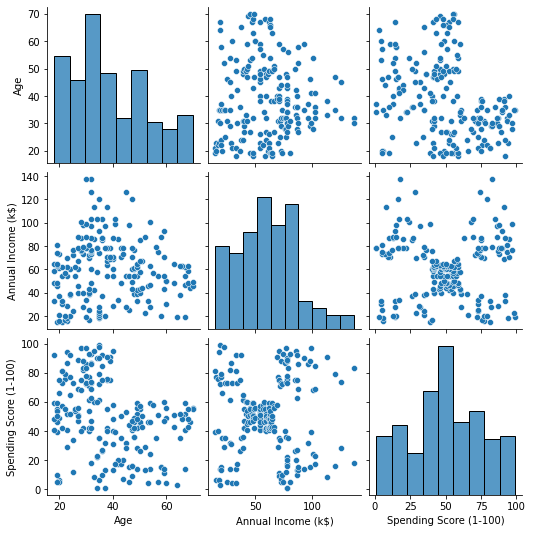

In [15]:
sns.pairplot(data=df)

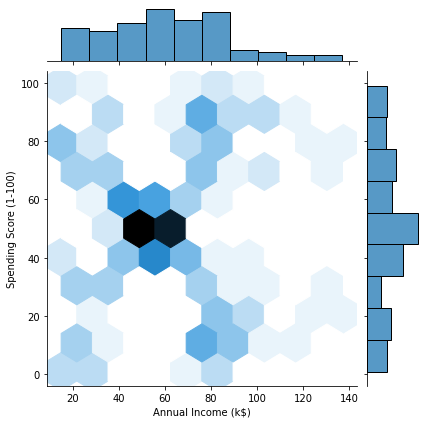

In [16]:
sns.jointplot(data=df, x='Annual Income (k$)',
              y='Spending Score (1-100)', kind='hex')


## K-MEANS CLUSTERING

In [17]:
x_train = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
x_train

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'WCSS')

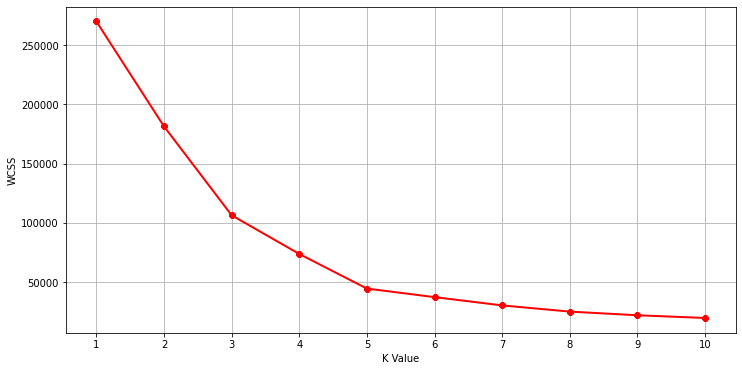

In [18]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

Text(0.5, 1.0, 'KMEANS')

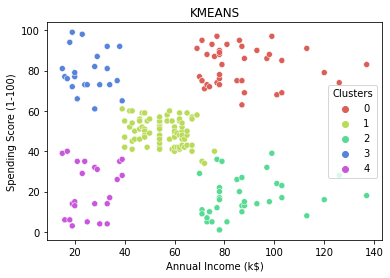

In [19]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(x_train)
x_train['Clusters'] = clusters

sns.scatterplot(data=x_train, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue=x_train['Clusters'], palette=sns.color_palette('hls', np.unique(clusters).shape[0]))
plt.title('KMEANS')


In [20]:
KM_clusters = x_train.copy()
KM_clust_sizes = KM_clusters.groupby('Clusters').size().to_frame()
KM_clust_sizes.columns = ['KM_SIZE']
KM_clust_sizes

,KM_SIZE
Clusters,
0,39
1,81
2,35
3,22
4,23


<AxesSubplot:xlabel='Clusters', ylabel='count'>

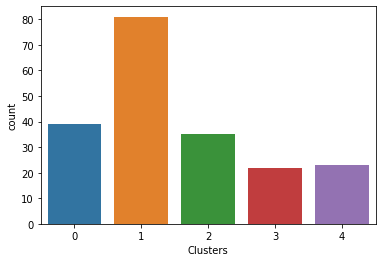

In [21]:
sns.countplot(data=x_train, x='Clusters')

## MEANSHIFT CLUSTERING ALGORITHM

In [22]:
x_train = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
x_train

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


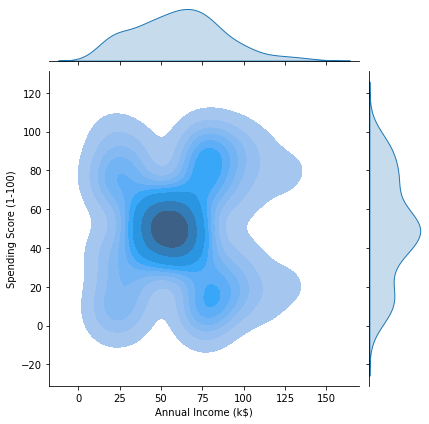

In [23]:
sns.jointplot(data=x_train, x='Annual Income (k$)',
              y='Spending Score (1-100)', kind='kde', fill=True)


Text(0.5, 1.0, 'MeanShift')

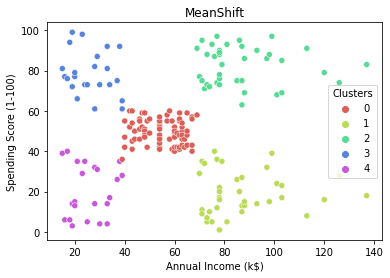

In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(x_train, quantile=0.15)
ms = MeanShift(bandwidth=bandwidth).fit(x_train)
clusters = ms.labels_
x_train['Clusters'] = clusters
sns.scatterplot(data=x_train, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue=x_train['Clusters'], palette=sns.color_palette('hls', np.unique(clusters).shape[0]))
plt.title('MeanShift')


In [25]:
MS_clusters = x_train.copy()
MS_clust_sizes = MS_clusters.groupby('Clusters').size().to_frame()
MS_clust_sizes.columns = ['MS_SIZE']
MS_clust_sizes


,MS_SIZE
Clusters,
0,78
1,38
2,39
3,23
4,22


<AxesSubplot:xlabel='Clusters', ylabel='count'>

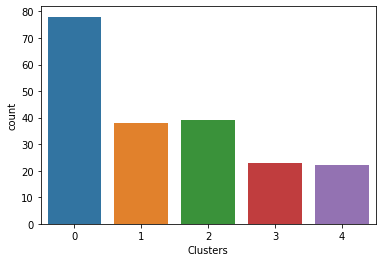

In [26]:
sns.countplot(data=x_train, x='Clusters')

# DBSCAN CLUSTERING ALGORITHM

In [27]:
x_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
x_train

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Text(0.5, 1.0, 'DBSCAN')

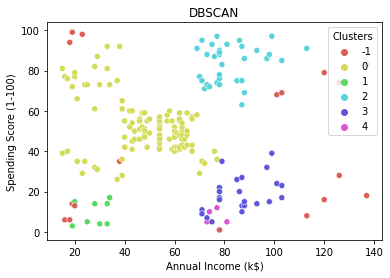

In [28]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=12.5, min_samples=4).fit(x_train)
clusters = dbs.labels_
x_train['Clusters'] = clusters

sns.scatterplot(data=x_train, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue=x_train['Clusters'], palette=sns.color_palette('hls', np.unique(clusters).shape[0]))
plt.title('DBSCAN')


In [29]:
DB_clust_sizes = x_train.groupby('Clusters').size().to_frame()
DB_clust_sizes.columns = ['Size']
DB_clust_sizes

,Size
Clusters,
-1,18
0,112
1,8
2,34
3,24
4,4


<AxesSubplot:xlabel='Clusters', ylabel='count'>

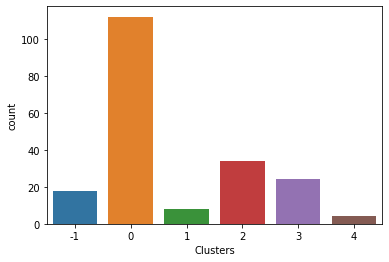

In [30]:
sns.countplot(data=x_train, x='Clusters')

# Evaluation

## Silhouette Coefficient
`s = (b-a) / max(a, b)`

The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same cluster.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [31]:
from sklearn import metrics
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
print('Silhoutette score of K-Means Clustering: ', metrics.silhouette_score(X, km.labels_ , metric='euclidean'))
print('Silhoutette score of Mean-Shift Clustering: ', metrics.silhouette_score(X, ms.labels_ , metric='euclidean'))
print('Silhoutette score of DBSCAN Clustering: ', metrics.silhouette_score(X, dbs.labels_ , metric='euclidean'))

Silhoutette score of K-Means Clustering:  0.445342943973765
Silhoutette score of Mean-Shift Clustering:  0.4440190512029062
Silhoutette score of DBSCAN Clustering:  0.2555628510249617


## Davies-Bouldin Index
- In a few words, the score (DBI) is calculated as the average similarity of each cluster with a cluster most like it. The lower the average similarity is, the better the clusters are separated and the better the result of the clustering performed.
- This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.
- Zero is the lowest possible score. Values closer to zero indicate a better partition.
- The process of calculating the DBI is described in detail:
    - Step 1: Calculate intra-cluster dispersion
    - Step 2: Calculate separation measure
    - Step 3: Calculate similarity between clusters
    - Step 4: Find the most similar cluster for each cluster i
    - Step 5: Calculate Davies-Bouldin Index

In [32]:
from sklearn.metrics import davies_bouldin_score
print('Davies-Bouldin Index of K-Means Clustering: ',
      davies_bouldin_score(X, km.labels_))
print('Davies-Bouldin Index of Mean-Shift Clustering: ',
      davies_bouldin_score(X, ms.labels_))
print('Davies-Bouldin Index of DBSCAN Clustering: ',
      davies_bouldin_score(X, dbs.labels_))

Davies-Bouldin Index of K-Means Clustering:  0.8192356650760699
Davies-Bouldin Index of Mean-Shift Clustering:  0.8176845986843638
Davies-Bouldin Index of DBSCAN Clustering:  2.2368002838838277
